#### 비선형 회귀분석

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')                 # 한글처리위함
plt.rcParams['axes.unicode_minus'] = False    #축의 음수 기호 표시

In [3]:
w3 = pd.read_csv('data/chick005.csv')
w3.head()

,day,weight
0,1,43
1,2,55
2,3,69
3,4,86
4,5,104


In [4]:
w3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   day     70 non-null     int64
 1   weight  70 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


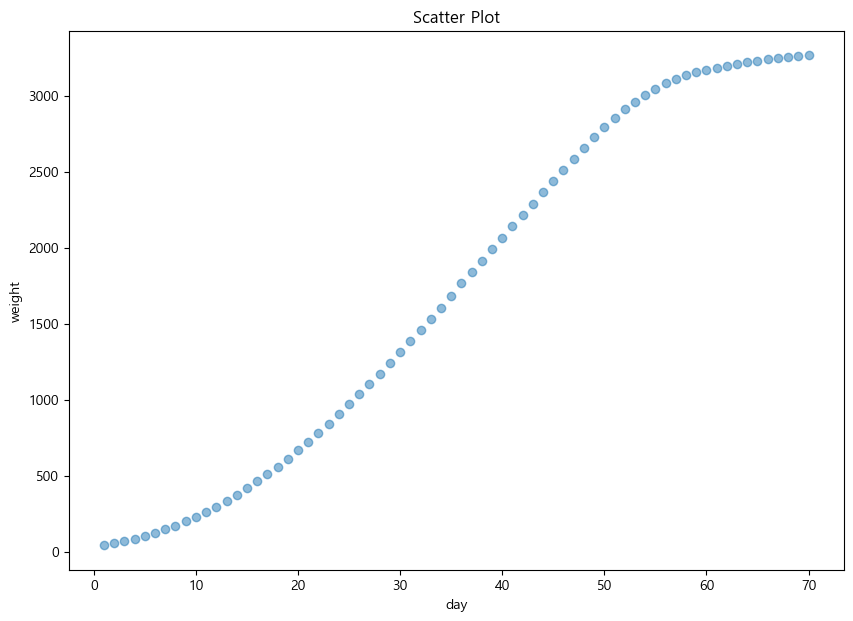

In [6]:
# 성장기간에 따른 몸무게 변화

plt.figure(figsize = (10,7))
plt.scatter(w3.day, w3.weight, alpha = .5)

plt.title('Scatter Plot')
plt.xlabel('day')
plt.ylabel('weight')
plt.show()


In [8]:
# 회귀분석 수행을 위한 모듈 불러오기 및 smf로 지칭하기
import statsmodels.formula.api as smf



In [10]:

# 단순선형회귀모델 구축
model_lm3 = smf.ols(formula = 'weight ~ day', data = w3)


result_lm3 = model_lm3.fit()
result_lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     3189.
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           7.22e-59
Time:                        12:39:10   Log-Likelihood:                -457.86
No. Observations:                  70   AIC:                             919.7
Df Residuals:                      68   BIC:                             924.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -295.8671     41.102     -7.198      0.000    -377.885    -213.850
day           56.8216      1.006     56.470      0.000      54.814      58.830
==============================================================================
Omnibus:                        3.866   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                2.079
Skew:                          -0.133   Prob(JB):                        0.354
Kurtosis:                       2.199   Cond. No.                         82.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

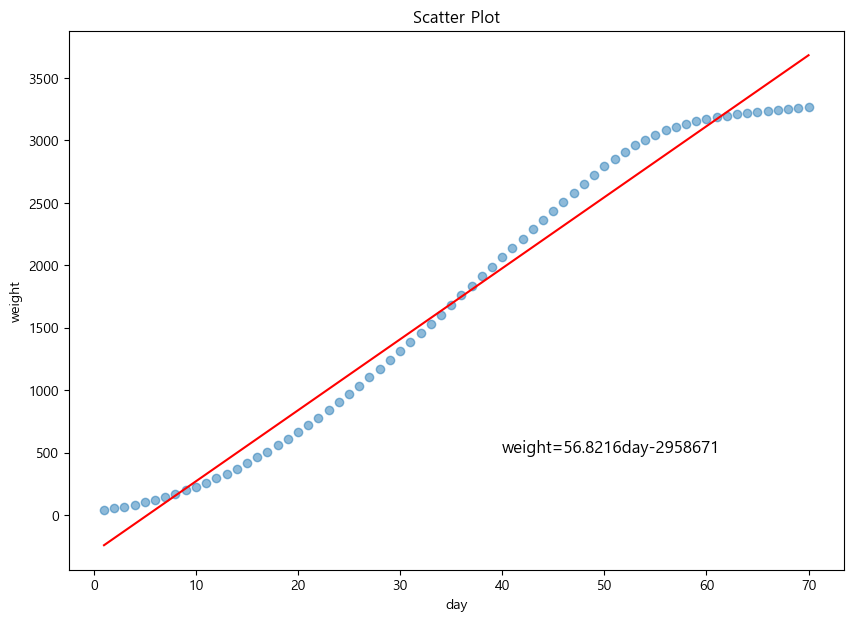

In [11]:
plt.figure(figsize = (10,7))
plt.scatter(w3.day, w3.weight, alpha = .5)

plt.plot(w3.day, w3.day*56.8216-295.8671, color='red')
plt.text(40,500,'weight=56.8216day-2958671',fontsize=12)


plt.title('Scatter Plot')
plt.xlabel('day')
plt.ylabel('weight')
plt.show()


## => 원본 그래프와 비교해보고 3차 함수와 유사하다는 결론을 내림.

In [13]:
model_nlm = smf.ols(formula = 'weight ~I(day**3)+I(day**2) + day', data = w3)  

# ## => 원본 그래프와 비교해보고 3차 함수와 유사하다는 결론을 내렸기때문에  
## 대문자 I라는 함수를 써서 3차함수 식 나타내면 비선형으로 나타남.

result_nlm = model_nlm.fit()
result_nlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.407e+04
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          7.13e-109
Time:                        12:49:06   Log-Likelihood:                -327.17
No. Observations:                  70   AIC:                             662.3
Df Residuals:                      66   BIC:                             671.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     117.0141     13.476      8.683      0.000      90.108     143.920
I(day ** 3)    -0.0253      0.000    -51.312      0.000      -0.026      -0.024
I(day ** 2)     2.6241      0.053     49.314      0.000       2.518       2.730
day           -15.2978      1.632     -9.373      0.000     -18.557     -12.039
==============================================================================
Omnibus:                        6.702   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                2.680
Skew:                           0.103   Prob(JB):                        0.262
Kurtosis:                       2.064   Cond. No.                     5.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

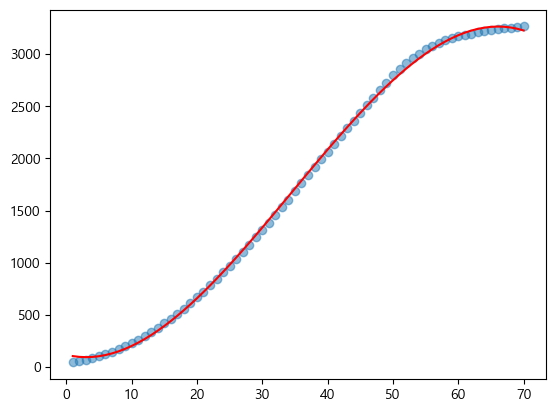

In [14]:
plt.scatter(w3.day, w3.weight, alpha = .5)
plt.plot(w3.day, (w3.day**3)*(-0.0253) + (w3.day**2)*2.6241 + w3.day*(-15.2978) + 117.0141, color = 'red')
plt.show()